# Multiclass Classification
Classifying more-than-two labels/classes. Could be 3, could be 100.  
Steps:
- **get data ready** (create tensors from dataset)
- **build a model**: diy or pre-trained
- **fit the model** to the data, make predictions
- **evaluate the model**: how'd it do?
- **Experimentation**: do better
- **save & reload the model**

In [92]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random
from tensorflow.keras.utils import plot_model

## Import Data: Fashion Items
60K items.  
28x28 images.  
[fashion_mnist dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print(f'Training Data:\n{train_data[0]}')
print(f'Training Label:\n{train_labels[0]}')

Training Data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [4]:
print(f'data shape: {train_data[0].shape}')

data shape: (28, 28)


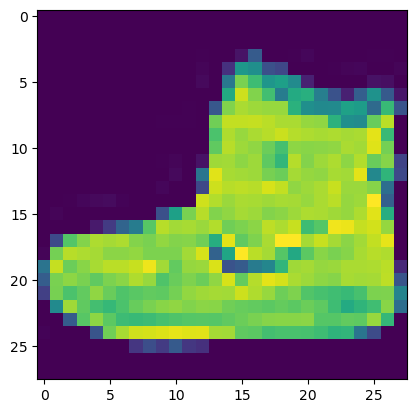

In [5]:
plt.imshow(train_data[0])

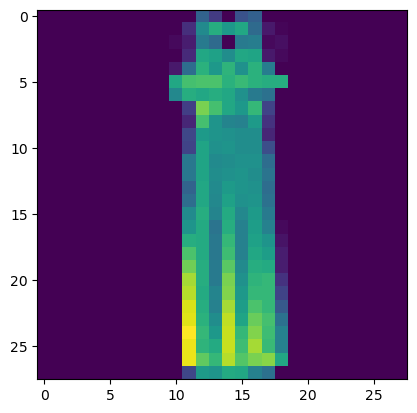

In [6]:
plt.imshow(train_data[250])

## Prep A Label-List
The labels can be found in the [readme](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#labels)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
len(class_names)

10

## Visualize An Image And It's label

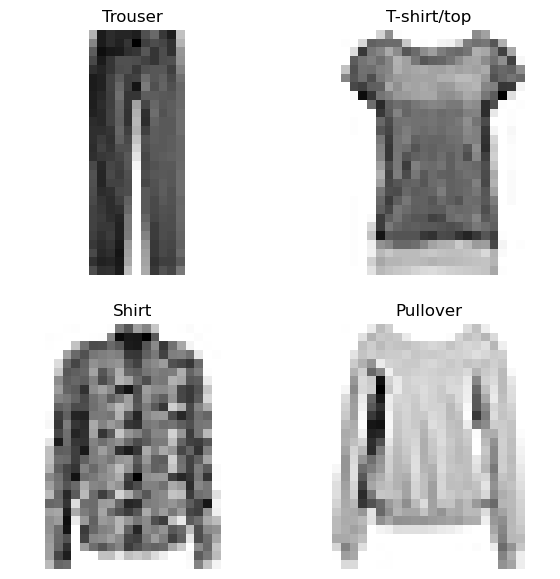

In [9]:
# 
# A SINGLE image
# 
 
# itm_idx = 122
# imgItm = train_data[itm_idx]
# labelItm = train_labels[itm_idx]
# label = class_names[labelItm]
# plt.imshow(imgItm, cmap=plt.cm.binary)
# plt.title(label)


# MULTIPLE
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build A Model
### First Go

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model
m1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
m1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = m1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 2.3440 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_ac

### View Model Stats

In [11]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
train_data.min(), train_data.max()

(0, 255)

## Normalize: Scale The Training Data between 0-1

In [13]:
# normalizedTrainData = train_data / train_data.max()
# normalizedTestData = test_data / train_data.max()

train_data = train_data / train_data.max()
test_data = test_data / train_data.max()

In [14]:
train_data.min(), train_data.max()

(0.0, 1.0)

## Model 2: Use Normalized Data

In [15]:
tf.random.set_seed(42)

# Create the model
# m2 = tf.keras.Sequential()
# m2.add(inputLayer)
# m2.add(dense4Relu)
# m2.add(dense4Relu2)
# m2.add(outputLayer)
m2  = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
m2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
m2History = m2.fit(train_data,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 1.1695 - accuracy: 0.5695 - val_loss: 98.7704 - val_accuracy: 0.6123
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7654 - accuracy: 0.7142 - val_loss: 95.7524 - val_accuracy: 0.6404
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6770 - accuracy: 0.7430 - val_loss: 107.7179 - val_accuracy: 0.6517
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6345 - accuracy: 0.7629 - val_loss: 132.3661 - val_accuracy: 0.6558
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5988 - accuracy: 0.7875 - val_loss: 133.8504 - val_accuracy: 0.6517
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5740 - accuracy: 0.7984 - val_loss: 152.3110 - val_accuracy: 0.6413
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5547 - accuracy: 0.8061 - val_loss: 137.0

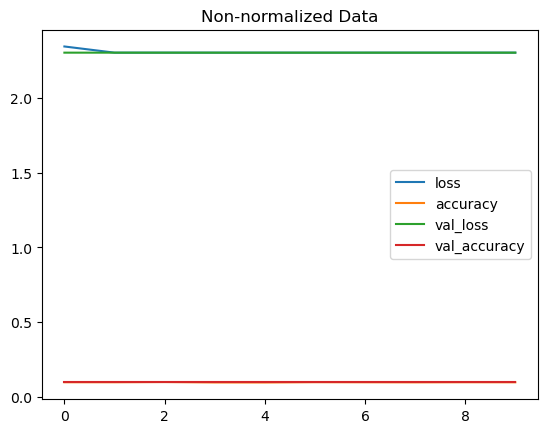

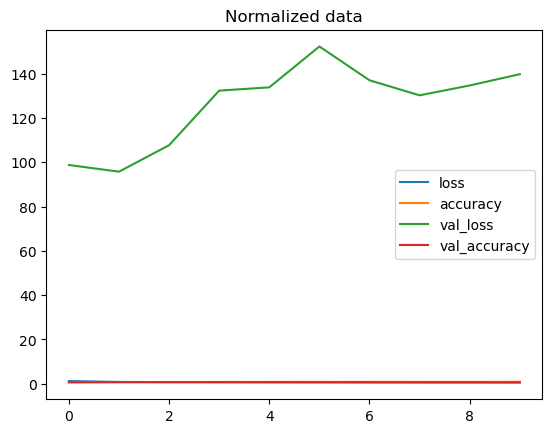

In [16]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(m2History.history).plot(title="Normalized data");

## Find The Ideal Learning Rate
### Use A Learning-Rate Callback function

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create the model
m3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
m3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = m3.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 15s 7ms/step - loss: 1.4091 - accuracy: 0.4652 - val_loss: 74.6509 - val_accuracy: 0.4856 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0343 - accuracy: 0.5916 - val_loss: 70.9714 - val_accuracy: 0.5145 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9264 - accuracy: 0.6197 - val_loss: 66.1796 - val_accuracy: 0.5539 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8483 - accuracy: 0.6515 - val_loss: 128.6515 - val_accuracy: 0.5237 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7302 - accuracy: 0.7148 - val_loss: 125.1165 - val_accuracy: 0.5949 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6968 - accuracy: 0.7238 - val_loss: 140.1734 - val_accuracy: 0.5466 - lr: 0.0018
Epoch 7/40
1875/1875 [=====================

### Visualize The Learning-Rate Change

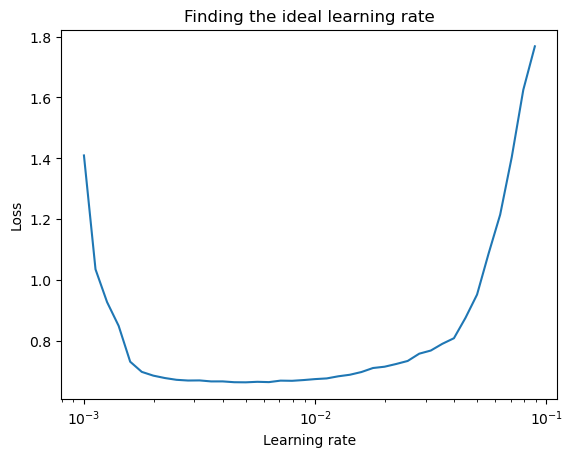

In [18]:
lrFunction = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrFunction, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Looks like the lowest learning-rate-to-loss ratio the default learning rate of the adam optimizer, `.001`.  

In [19]:
## Model WIth Defined Learning Rate
# Set random seed
tf.random.set_seed(42)

# Create the model
m4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
m4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = m4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 15s 7ms/step - loss: 1.2054 - accuracy: 0.5671 - val_loss: 122.9842 - val_accuracy: 0.5750
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7315 - accuracy: 0.7357 - val_loss: 118.6544 - val_accuracy: 0.5833
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6583 - accuracy: 0.7706 - val_loss: 122.1851 - val_accuracy: 0.6613
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6251 - accuracy: 0.7818 - val_loss: 129.3546 - val_accuracy: 0.6584
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6058 - accuracy: 0.7899 - val_loss: 122.6741 - val_accuracy: 0.6797
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5830 - accuracy: 0.7999 - val_loss: 127.4217 - val_accuracy: 0.6715
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5640 - accuracy: 0.8071 - val_loss: 121

In [20]:
predictions = m4.predict(test_data)
firstPrediction = predictions[0]
print(f'first prediction: {firstPrediction}')
firstPrediction.argmax(), class_names[firstPrediction.argmax()]

313/313 [==============================] - 2s 5ms/step
first prediction: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


(9, 'Ankle boot')

### Visualize: Confusion Matrix

In [21]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  """
  # 
  # Create the confusion matrix
  # 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # 
  # Plot the figure and make it pretty
  # 
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # 
  # Are there a list of classes?
  # 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # 
  # Label the axes
  # 
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # 
  # Make x-axis labels appear on bottom
  # 
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # 
  # Set the threshold for different colors
  # 
  threshold = (cm.max() + cm.min()) / 2.

  # 
  # Plot the text on each cell
  # 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [22]:
predictions[:10]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00

In [28]:
predictionsForMatrix = predictions.argmax(axis=1)
confusion_matrix(test_labels,predictionsForMatrix)

array([[779,  91,  70,   7,   3,   0,   0,   0,  24,  26],
       [  6, 978,   9,   1,   3,   0,   0,   0,   1,   2],
       [ 37,  18, 811,   0, 117,   0,   0,   0,   4,  13],
       [ 73, 539,  30, 272,  40,   0,   0,   0,  37,   9],
       [  6,  39, 255,   4, 680,   0,   0,   0,  15,   1],
       [  0,   0,   0,   0,   1, 578,   0, 197,  19, 205],
       [311,  35, 406,   6, 146,   0,   0,   0,  39,  57],
       [  0,   0,   0,   0,   0,   1,   0, 796, 127,  76],
       [ 13,   0,   5,   5,  11,   0,   0,   3, 924,  39],
       [  1,   0,   0,   0,   0,   0,   0,  30,   3, 966]])

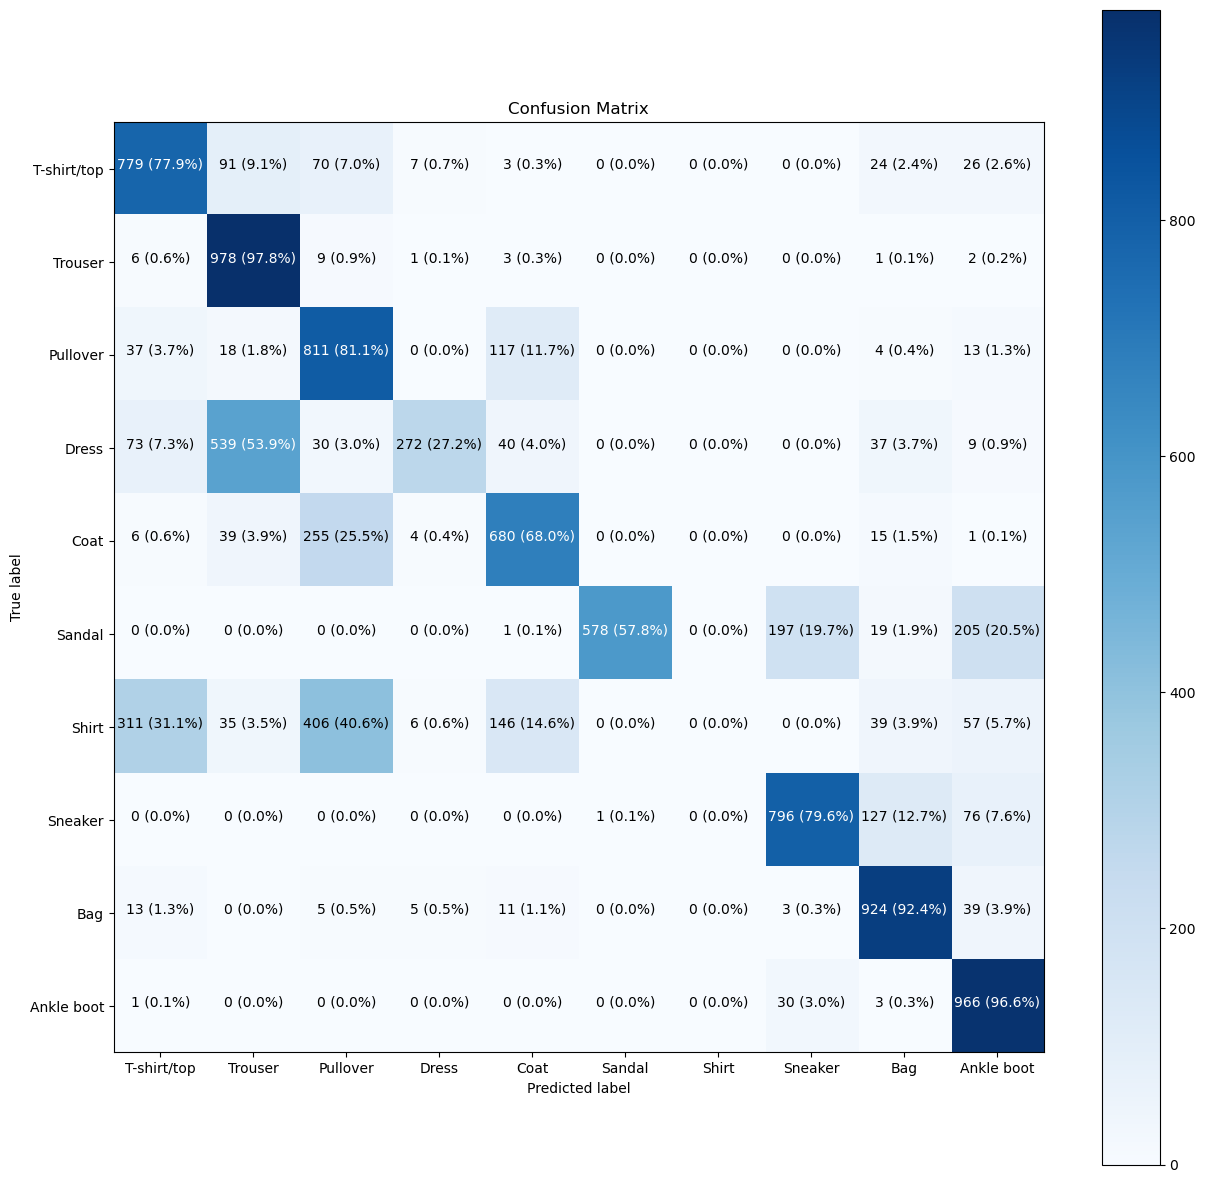

In [29]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=predictionsForMatrix,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [31]:
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 62ms/step


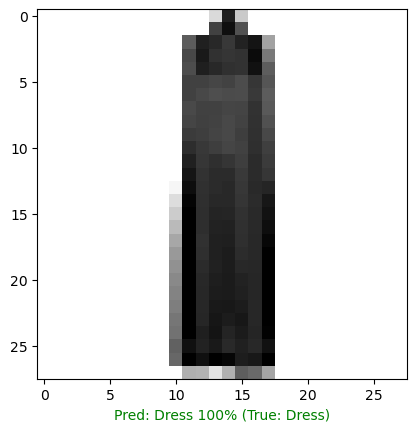

In [37]:
# Check out a random image as well as its prediction
plot_random_image(model=m4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

## Model Inspection: Takeaways
### Inspect Layers & Weights
- input data gets transformed into a tensor, & passed to neural network
- **layer weights are RANDOM** at the beginning (_unless manually set_)
- as epochs & examples go-by, **layer weights get updated by tensorflow**

The `Flatten` input layer will not show weights & biases.  
Hidden layers have weights & biases.  


In [38]:
m4.layers

In [39]:
# view a specific layer
m4.layers[0]

In [41]:
m4.layers[0].get_weights()

[]

In [48]:
m4.layers[1].get_weights()

[array([[-0.12337709,  0.09030653,  0.7353236 ,  0.13560836],
        [-0.31991658,  0.33139753,  0.4457463 ,  0.61089003],
        [-0.70526534, -0.01126017,  0.8258737 ,  0.2855054 ],
        ...,
        [-0.2756428 , -0.30044994,  0.4903443 , -0.2125302 ],
        [-0.27102318, -0.44868416, -0.26559395,  0.1634084 ],
        [-0.22981353, -0.34245798,  0.23139371,  0.3610084 ]],
       dtype=float32),
 array([1.8115127, 2.7588913, 1.2623163, 2.0580924], dtype=float32)]

In [50]:
# a weight SHAPE is the same as the input image shape WxH
print(f'model layer 1 weight matrix shape: {len(m4.layers[1].get_weights()[0])}')
print(f'input image shape WxH: {28*28}')

model layer 1 weight matrix shape: 784
input image shape WxH: 784


In [51]:
print(f'how many weights in layer 2: {len(m4.layers[1].get_weights())}')

how many weights in layer 2: 2


In [68]:
layerTwoWeights, layerTwoBiases = m4.layers[1].get_weights()
print(f'layerTwoWeights Shape: {layerTwoWeights.shape}')
layerTwoWeights[0]

layerTwoWeights Shape: (784, 4)


array([-0.12337709,  0.09030653,  0.7353236 ,  0.13560836], dtype=float32)

In [55]:
layerTwoBiases[0]

1.8115127

In [57]:
layerTwoBiases.shape

(4,)

### View Stats about each layer

In [91]:
for idx in range(0,len(m4.layers)):
    print(f'-----L{idx}')
    if(idx != 0 and idx != len(m4.layers) - 1):
        lWeights, lBiases = m4.layers[idx].get_weights()
        print('HIDDEN')
        print(f'    weights shape: {lWeights.shape}')
        print(f'    biases shape: {lBiases.shape}')
    if(idx == 0):
        print(f'Flat layer')
    if(idx == len(m4.layers) - 1):
        print(f'    weights shape: {lWeights.shape}')
        print(f'    biases shape: {lBiases.shape}')
    print('-------------')

-----L0
Flat layer
-------------
-----L1
HIDDEN
    weights shape: (784, 4)
    biases shape: (4,)
-------------
-----L2
HIDDEN
    weights shape: (4, 4)
    biases shape: (4,)
-------------
-----L3
    weights shape: (4, 4)
    biases shape: (4,)
-------------


In [93]:
plot_model(m4)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [94]:
# INTERESTING HERE!
m4.get_config()

{'name': 'sequential_3',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_3_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_3',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_9',
    'trainable': True,
    'dtype': 'float32',
    'units': 4,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name